# **🏘️ Using CNN to Recognize Street View Housing Number**

## **I. Project Overview** 

### **i. Context** 

Deep learning, known for its ability to automatically learn hierarchical feature representations, excels at handling large and complex datasets and achieving high predictive accuracy. These strengths have driven remarkable progress in visual information processing, enabling a wide range of applications—from object recognition in natural scenes to automated decision-making systems.

Among these applications, house number digit recognition represents an especially impactful task in computer vision. Accurate identification of digits from real-world imagery plays a crucial role in robotics and autonomous systems, supporting activities such as safety patrol, package delivery, and navigation. Improved recognition performance in these contexts directly translates to greater reliability and convenience in everyday life.

In this project, we utilize the Street View House Numbers (SVHN) dataset, which contains more than 600,000 labeled digit images extracted from street-level photographs. SVHN is one of the most widely used benchmarks for image recognition and has played a central role in advancing deep neural network research. Notably, it has been used by Google to enhance map quality by automatically transcribing house numbers from raw pixel patches. These transcriptions, when paired with known street addresses, help accurately localize corresponding buildings and improve the overall precision of geographic information systems.

### **ii. Objective**

The objective of this project is to accurately predict the digit depicted in each image using two major classes of deep learning models: Artificial (Fully Connected) Feedforward Neural Networks (FNNs) and Convolutional Neural Networks (CNNs). We explore multiple architectures within each model family, evaluate their performance, and ultimately select the model that achieves the highest accuracy and generalization capability on the SVHN dataset.

### **iii. Dataset**

The Street View House Numbers (SVHN) dataset serves as the foundation for our digit recognition experiments. SVHN is a large-scale, real-world dataset derived from Google Street View imagery and contains more than 600,000 labeled instances of digits captured from house numbers. Each sample is provided as a 32×32 three-channel (RGB) image, offering consistent dimensionality suitable for training deep learning models.

The dataset is organized into three primary subsets:

- **Training set:** 73,257 images  
- **Test set:** 26,032 images  
- **Extra set:** 531,131 images for extended training

Unlike synthetic datasets such as MNIST, SVHN reflects real-world complexity. The digits appear within natural scenes and exhibit significant variability in background texture, illumination, viewpoint, shadows, blur, and partial occlusion. These challenging characteristics make SVHN a highly representative benchmark for evaluating the robustness and generalization ability of deep learning models.

Due to its scale, diversity, and realistic noise, SVHN has been widely adopted in research on object recognition and deep learning. It offers an ideal testing ground for architectures such as Fully Connected Neural Networks and Convolutional Neural Networks, particularly when assessing performance in real-world visual recognition tasks.


### **iv. Libraries**

In [1]:
# ----- I. Project Overview -----
# This chapter does not have Python code.

# ----- II. Preparation -----
# Deep learning package
import tensorflow as tf
# Dataset
import h5py
# Visualization
import matplotlib.pyplot as plt
# One-hot encoding
from tensorflow.keras.utils import to_categorical

# ----- III. Modelling -----
# Random seeding
import random
# Numerical data operation
import numpy as np
# Sequential model class from Keras
from tensorflow.keras.models import Sequential
# Commonly used neural network layers.
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
# Adam optimizer for training the neural network
from tensorflow.keras.optimizers import Adam
# Backend
from tensorflow.keras import backend

# ----- IV. Predictions on the Test Data -----
# Classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Visualization
import seaborn as sns

# ----- V. Conclusion -----
# This chapter does not have Python code.

2025-11-16 21:22:31.932399: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## **II. Preparation** 

### **i. Dataset**

In [2]:
# Open the file as read only.
h5f = h5py.File('SVHN_single_grey1.h5', 'r')
# Load the training and the test dataset.
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file.
h5f.close()

In [3]:
len(X_train), len(X_test)

(42000, 18000)

**🔬 Observation:**

There are 42,000 images in the training data and 18,000 images in the testing data.

### **ii. Image Visualization**

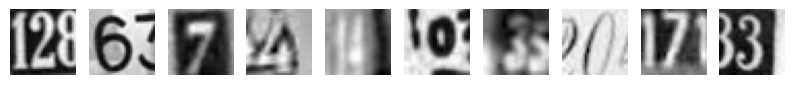

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [4]:
# Set the figure.
plt.figure(figsize = (10, 1))
# Iterate the first 10 images.
for i in range(10):
    # Draw the subplot.
    plt.subplot(1, 10, i+1)
    # Show the image in grey scale.
    plt.imshow(X_train[i], cmap = "gray")
    # Remove the axis for image visualization.
    plt.axis('off')

# Display all subplots.
plt.show()
# Print the label of each image.
print('label for each of the above image: %s' % (y_train[0:10]))

### **iii. Data preparation**

In [5]:
# Print the shape of the first image and array of pixels.
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [6]:
# Reshape the dataset to flatten them (2D image into 1D array).
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [7]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train/255
X_test = X_test/255
# Print the dataset shape.
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [8]:
# One-hot encode output.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Show test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**🔬 Observation:**

Each entry of the target variable is a one-hot encoded vector instead of a single label.

## **III. Modelling**

### **i. Model 1**

#### **1. Random Number Generators**

In [9]:
# Set a fixed seed value.
seed = 42
# Set the seed for Python's built-in random module. Ensure any random operations to behave the same each run.
random.seed(seed)
# Set the seed for NumPy's random number generator. Control randomness in NumPy operations.
np.random.seed(seed)
# Set the seed for TensorFlow's random number generator. Make TensorFlow operations reproducible.
tf.random.set_seed(seed)

#### **2. Model Architecture**

In [10]:
def nn_model_1():
    """
    Builds and compiles a fully connected feed-forward neural network (FNN)
    for digit classification.

    The model consists of:
        - A first hidden layer with 64 neurons and ReLU activation,
          receiving input vectors of length 1024.
        - A second hidden layer with 32 neurons and ReLU activation.
        - An output layer with 10 neurons and softmax activation for
          multiclass classification.

    The model is compiled using:
        - Loss function: categorical_crossentropy
        - Optimizer: Adam with a learning rate of 0.001
        - Metric: accuracy

    Returns
    -------
    model : keras.src.models.sequential.Sequential
        The compiled neural network model.

    """
    # Initialize a model.
    model = Sequential() 
    # Add the first hidden layer.
    model.add(Dense(64, activation='relu', input_shape=(1024,)))
    # Add the second hidden layer.
    model.add(Dense(32, activation='relu'))
    # Add the output layer.
    model.add(Dense(10, activation='softmax'))
    # Compile the model.
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

In [11]:
# Build the model.
model_1 = nn_model_1()

/opt/anaconda3/envs/tf311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Print the summary.
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Fit the model on the training data.
history_model_1 = model_1.fit(
    X_train,                 # training features
    y_train,                 # training labels
    validation_split=0.2,    # use 20% of training data for validation
    batch_size=128,          # batch size
    epochs=20,               # number of epochs
    verbose=1                # show training progress
)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1233 - loss: 2.2934 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2442 - loss: 2.0864 - val_accuracy: 0.3065 - val_loss: 1.9384
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3411 - loss: 1.8713 - val_accuracy: 0.3844 - val_loss: 1.7683
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4632 - loss: 1.6183 - val_accuracy: 0.5104 - val_loss: 1.4989
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5348 - loss: 1.4276 - val_accuracy: 0.5558 - val_loss: 1.3696
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5701 - loss: 1.3375 - val_accuracy: 0.5798 - val_loss: 1.3064
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5937 - loss: 1.2789 - val_accuracy: 0.6043 - val_loss: 1.2545
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6112 - loss: 1.2323 - val_accuracy: 0.

#### **3. Accuracy Visualization**

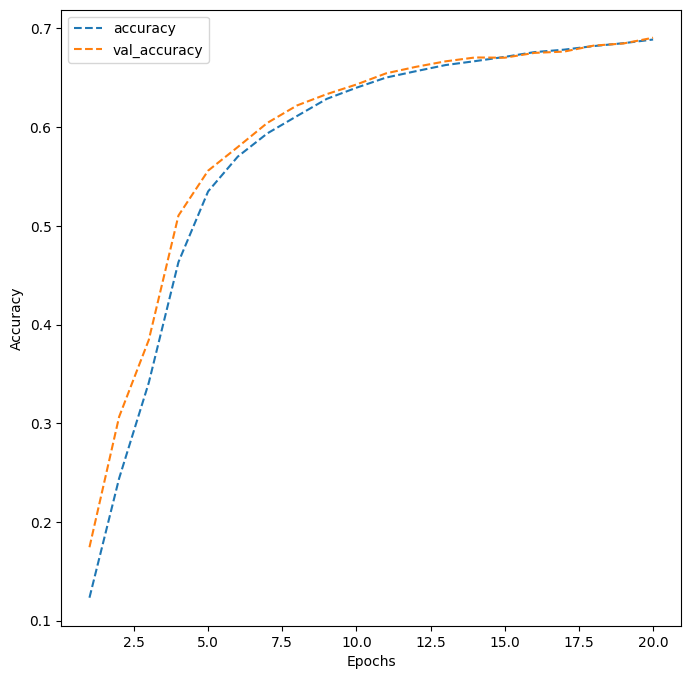

In [14]:
# Extract the training history dictionary from the model.
dict_hist = history_model_1.history
# Create a list of epoch numbers from 1 to 20.
list_ep = [i for i in range(1, 21)]
# Set the size of the plot.
plt.figure(figsize=(8, 8))
# Plot training accuracy across epochs.
plt.plot(list_ep, dict_hist['accuracy'], ls='--', label='accuracy')
# Plot validation accuracy across epochs.
plt.plot(list_ep, dict_hist['val_accuracy'], ls='--', label='val_accuracy')
# Label the axes.
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# Display legend for the curves.
plt.legend()
# Show the accuracy plot.
plt.show()

**🔬 Observations:**

- The training and validation accuracies show a consistent upward trend across all 20 epochs, indicating that the model is successfully learning from the data.
- The training accuracy improves from **12.87%** in the first epoch to **63.50%** by epoch 20, while the validation accuracy increases from **19.58%** to **64.25%** over the same period.
- The validation accuracy closely tracks the training accuracy throughout training, suggesting that the model is not overfitting and is generalizing reasonably well.
- However, both curves rise gradually and appear to approach a plateau near the end of training, indicating that performance gains are slowing.
- This suggests that the model may benefit from additional capacity (e.g., more layers or neurons), more training epochs, or a different architecture (such as a convolutional neural network) to achieve higher accuracy.
- Overall, the model shows steady learning progress but remains relatively limited in performance due to its simple fully connected structure.

### **ii. Model 2**

#### **1. Random Number Generators**

In [15]:
# Clear the previous Keras session to free up resources and reset the model state.
backend.clear_session()
# Set the seed for Python's built-in random module. Ensure any random operations to behave the same each run.
random.seed(seed)
# Set the seed for NumPy's random number generator. Control randomness in NumPy operations.
np.random.seed(seed)
# Set the seed for TensorFlow's random number generator. Make TensorFlow operations reproducible.
tf.random.set_seed(seed)

#### **2. Model Architecture**

In [16]:
def nn_model_2():
    """
    Builds and compiles a fully connected feed-forward neural network (FNN)
    for digit classification.

    The model consists of:
        - A first hidden layer with 128 neurons and ReLU activation,
          receiving input vectors of length 1024.
        - A second hidden layer with 128 neurons and ReLU activation.
        - A dropout layer with the rate equal to 0.2.
        - A third hidden layer with 64 neurons and ReLU activation.
        - A forth hidden layer with 64 neurons and ReLU activation.
        - A fifth hidden layer with 32 neurons and ReLU activation.
        - A batch normalization.
        - An output layer with 10 neurons and softmax activation for
          multiclass classification.

    The model is compiled using:
        - Loss function: categorical_crossentropy
        - Optimizer: Adam with a learning rate of 0.0005
        - Metric: accuracy

    Returns
    -------
    model : keras.src.models.sequential.Sequential
        The compiled neural network model.

    """
    # Initialize a model.
    model = Sequential() 
    # Add the first hidden layer.
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    # Add the second hidden layer.
    model.add(Dense(128, activation='relu'))
    # Dropout layer
    model.add(Dropout(0.2))
    # Add the third hidden layer.
    model.add(Dense(64, activation='relu'))
    # Add the forth hidden layer.
    model.add(Dense(64, activation='relu'))
    # Add the fifth hidden layer.
    model.add(Dense(32, activation='relu'))
    # Add batch normalization.
    model.add(BatchNormalization())
    # Add the output layer.
    model.add(Dense(10, activation='softmax'))
    # Compile the model.
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
    return model

In [17]:
# Build the model.
model_2 = nn_model_2()

In [18]:
# Print the summary.
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

In [19]:
# Fit the model on the training data.
history_model_2 = model_2.fit(
    X_train,                 # training features
    y_train,                 # training labels
    validation_split=0.2,    # use 20% of training data for validation
    batch_size=128,          # batch size
    epochs=30,               # number of epochs
    verbose=1                # show training progress
)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0998 - loss: 2.3719 - val_accuracy: 0.1058 - val_loss: 2.3024
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1185 - loss: 2.2916 - val_accuracy: 0.1764 - val_loss: 2.2646
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3049 - loss: 1.9371 - val_accuracy: 0.4208 - val_loss: 1.7347
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4548 - loss: 1.5737 - val_accuracy: 0.4692 - val_loss: 1.5011
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5302 - loss: 1.3881 - val_accuracy: 0.5631 - val_loss: 1.3225
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5823 - loss: 1.2575 - val_accuracy: 0.6330 - val_loss: 1.1578
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6204 - loss: 1.1703 - val_accuracy: 0.6389 - val_loss: 1.1230
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6410 - loss: 1.1102 - val_accuracy: 0.

#### **3. Accuracy Visualization**

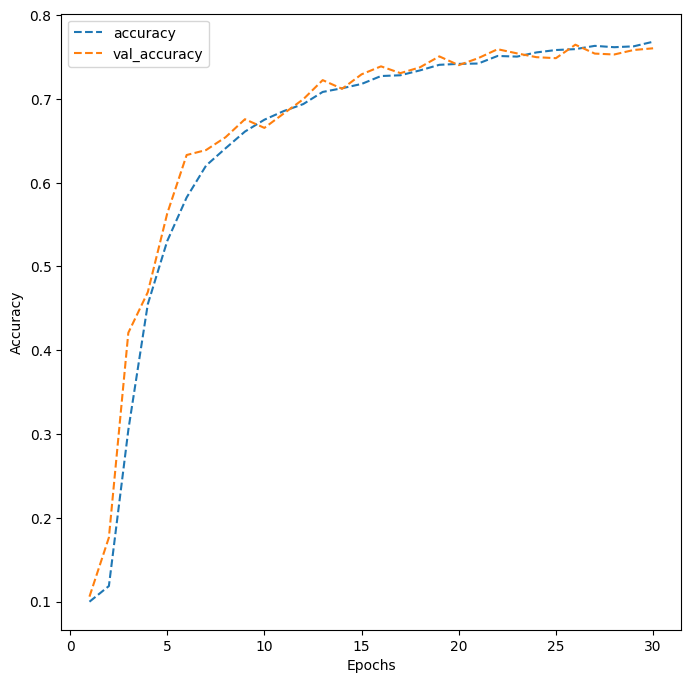

In [20]:
# Extract the training history dictionary from the model.
dict_hist = history_model_2.history
# Create a list of epoch numbers from 1 to 20.
list_ep = [i for i in range(1, 31)]
# Set the size of the plot.
plt.figure(figsize=(8, 8))
# Plot training accuracy across epochs.
plt.plot(list_ep, dict_hist['accuracy'], ls='--', label='accuracy')
# Plot validation accuracy across epochs.
plt.plot(list_ep, dict_hist['val_accuracy'], ls='--', label='val_accuracy')
# Label the axes.
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# Display legend for the curves.
plt.legend()
# Show the accuracy plot.
plt.show()

**🔬 Observations:**

- The training and validation accuracies show significant improvement over the 30 epochs, indicating that the model is effectively learning from the data. The training accuracy increases steadily from **9.98%** in the first epoch to **76.82%** by epoch 30, while the validation accuracy improves from **10.58%** to **76.04%** over the same period.
- The validation accuracy closely follows the training accuracy throughout, suggesting that the model generalizes well and does not exhibit major overfitting. Some fluctuations are observed in validation accuracy around epochs 10–30, but the overall trend remains positive.
- Compared to simpler fully connected models, this deeper architecture with additional hidden layers, dropout, and batch normalization shows **much faster learning in the initial epochs** and achieves a **higher final accuracy**, demonstrating the effectiveness of the added capacity and regularization techniques.
- Overall, the model exhibits steady learning, strong generalization, and improved performance compared to previous simpler models.

## **IV. Predictions on the Test Data**

In [21]:
# Predict class probabilities for the test set using model_2.
test_pred = model_2.predict(X_test)
# Convert the predicted probabilities to class labels by taking the index of the maximum value in each prediction (argmax).
test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    


In [22]:
# Converting each entry to single label from one-hot encoded vector for the convenience of classification report.
y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1814
           1       0.73      0.83      0.78      1828
           2       0.72      0.82      0.77      1803
           3       0.68      0.75      0.71      1719
           4       0.86      0.79      0.83      1812
           5       0.73      0.70      0.72      1768
           6       0.81      0.75      0.78      1832
           7       0.87      0.70      0.77      1808
           8       0.64      0.76      0.70      1812
           9       0.79      0.73      0.76      1804

    accuracy                           0.76     18000
   macro avg       0.77      0.76      0.76     18000
weighted avg       0.77      0.76      0.76     18000



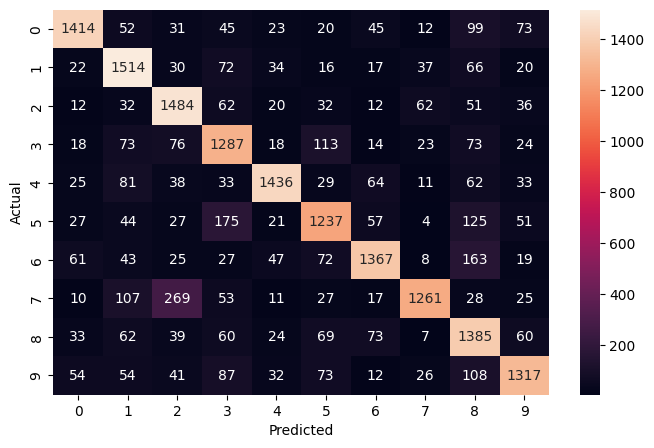

In [23]:
# Print the classification report.
print(classification_report(y_test, test_pred))
# Plot the heatmap using confusion matrix.
cm = confusion_matrix(y_test, test_pred)
# Set the figure.
plt.figure(figsize = (8, 5))
# Draw the heatmap.
sns.heatmap(cm, annot = True,  fmt = '.0f')
# Set y label.
plt.ylabel('Actual')
# Set x label.
plt.xlabel('Predicted')
# Show the plot.
plt.show()

**🔬 Observations:**

From the **classification report**:

- The overall accuracy of the model on the test set is **76%**, indicating reasonable performance on SVHN digits using this fully connected architecture.  
- Precision, recall, and F1-score vary across classes:  
  - Class 0 and 4 have the highest F1-scores (**0.81–0.83**), indicating the model predicts these digits more reliably.  
  - Classes 3, 5, 7, and 8 have comparatively lower F1-scores (**0.70–0.77**), showing that the model struggles more with these digits.  
- The weighted and macro averages are consistent (~0.76–0.77), suggesting balanced performance overall.

From the **confusion matrix / heatmap**:

- Most predictions lie along the diagonal, confirming that the model correctly classifies many samples.  
- Off-diagonal values highlight common misclassifications:  
  - Digit 7 is sometimes misclassified as 2 and 1.  
  - Digit 5 is misclassified as 3 and 8.  
  - Digit 8 is occasionally predicted as 6 or 5.  
- These misclassifications may be due to visual similarity between certain digits in street view images (e.g., 5 and 8, 7 and 1).  

## **V. Conclusion**

In this project, we developed and evaluated fully connected feed-forward neural network models for recognizing digits from street-view house numbers using the SVHN dataset. Two models were explored: a simpler architecture (`nn_model_1`) and a deeper, regularized model (`nn_model_2`) with additional hidden layers, dropout, and batch normalization.

**Key findings from the experiments:**

- Both models successfully learned from the data, with steadily increasing training and validation accuracy over epochs.  
- The deeper model (`nn_model_2`) demonstrated significantly improved performance compared to the simpler model, achieving a final validation accuracy of approximately **76%**.  
- Analysis of the classification report and confusion matrix revealed that the model performs better on certain digits (e.g., 0 and 4) while struggling with visually similar digits such as 5, 7, and 8.  
- Regularization techniques such as dropout and batch normalization helped the deeper model generalize well, preventing overfitting despite its increased complexity.

**Insights and Recommendations:**

- Fully connected networks provide a baseline for digit recognition, but their performance is limited on image data due to lack of spatial feature extraction.  
- Incorporating convolutional neural networks (CNNs) could capture spatial patterns and improve recognition accuracy.  
- Further improvements could be achieved by experimenting with deeper architectures, data augmentation, and hyperparameter tuning.

**Conclusion:**

Overall, the project demonstrates the ability of deep learning models to automatically learn features and classify digits from complex, real-world images. While fully connected networks provide a reasonable starting point, extending the approach to convolutional architectures is likely to yield superior performance, especially for challenging, visually similar digits.